In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split
import xgboost as xgb

In [2]:
months = {'Jan' : '../data/processed/jan_historical.csv', 'Feb' : '../data/processed/feb_historical.csv', 'Mar' : '../data/processed/mar_historical.csv',
         'Apr' : '../data/processed/apr_historical.csv', 'May' : '../data/processed/may_historical.csv', 'Jun' : '../data/processed/jun_historical.csv',
         'Jul' : '../data/processed/jul_historical.csv', 'Aug' : '../data/processed/aug_historical.csv', 'Sep' : '../data/processed/sep_historical.csv',
         'Oct' : '../data/processed/oct_historical.csv', 'Nov' : '../data/processed/nov_historical.csv', 'Dec' : '../data/processed/dec_historical.csv'}

In [3]:
avg_rmse = []
avg_r2 = []

for month in months:
    data = pd.read_csv(months.get(month))
    
    X = data.drop('TotalUnitsSold', axis=1)
    y = data['TotalUnitsSold']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    
    yhat_test = model.predict(X_test)
    
    avg_rmse.append(round(np.sqrt(mean_squared_error(y_test, yhat_test)), 3))
    avg_r2.append(round(r2_score(y_test, yhat_test), 3))
    
    print(f'{month} XGBoost RMSE: {round(np.sqrt(mean_squared_error(y_test, yhat_test)), 3)}')
    print(f'{month} XGBoost R^2: {round(r2_score(y_test, yhat_test), 3)} \n')
    
print(f'Average RMSE: {round(sum(avg_rmse) / len(avg_rmse), 3)}')
print(f'Average R^2: {round(sum(avg_r2) / len(avg_r2), 3)}')

Jan XGBoost RMSE: 14.623
Jan XGBoost R^2: 0.875 

Feb XGBoost RMSE: 7.095
Feb XGBoost R^2: 0.925 

Mar XGBoost RMSE: 6.639
Mar XGBoost R^2: 0.955 

Apr XGBoost RMSE: 5.869
Apr XGBoost R^2: 0.949 

May XGBoost RMSE: 7.824
May XGBoost R^2: 0.941 

Jun XGBoost RMSE: 4.903
Jun XGBoost R^2: 0.942 

Jul XGBoost RMSE: 5.039
Jul XGBoost R^2: 0.933 

Aug XGBoost RMSE: 6.335
Aug XGBoost R^2: 0.924 

Sep XGBoost RMSE: 7.287
Sep XGBoost R^2: 0.933 

Oct XGBoost RMSE: 8.265
Oct XGBoost R^2: 0.933 

Nov XGBoost RMSE: 12.977
Nov XGBoost R^2: 0.971 

Dec XGBoost RMSE: 13.436
Dec XGBoost R^2: 0.951 

Average RMSE: 8.358
Average R^2: 0.936


Text(0, 0.5, 'R^2')

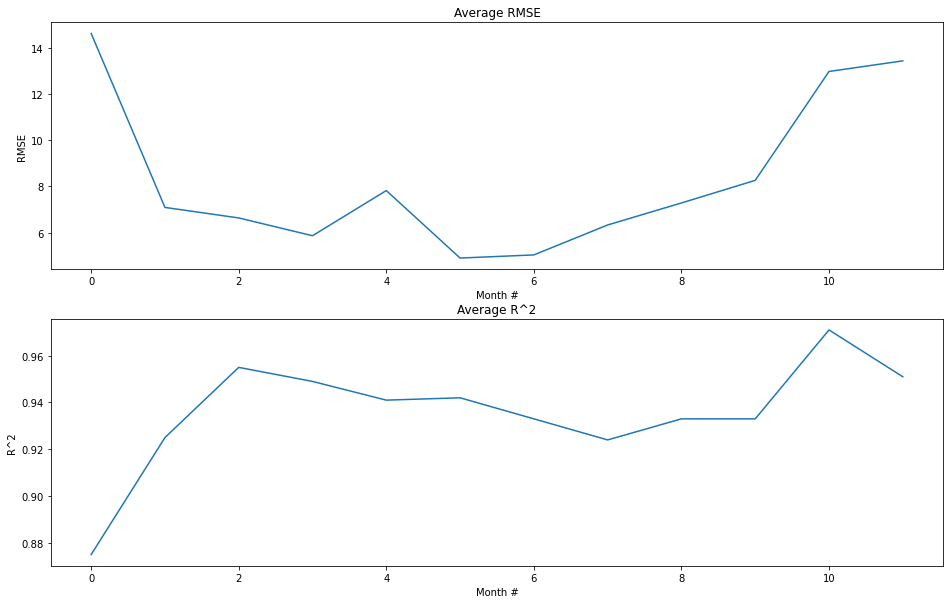

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

ax1.plot(avg_rmse)
ax1.set_title('Average RMSE')
ax1.set_xlabel('Month #')
ax1.set_ylabel('RMSE')

ax2.plot(avg_r2)
ax2.set_title('Average R^2')
ax2.set_xlabel('Month #')
ax2.set_ylabel('R^2')

In [14]:
X.tail()

,YearNumber,WeekOfYearNumber,StoreNumber,DepartmentNumber,SubDepartmentNumber,ClassNumber,SubClassNumber,TotalSales,TotalOHInventoryUnit,TotalOHInventoryCost
620931,22,52,50,30,320,320,320,11.98,61,189.69
620932,22,52,50,30,320,320,321,48.92,174,412.16
620933,22,52,50,30,320,320,322,9.99,48,101.30
620934,22,52,50,30,320,320,323,37.96,153,1234.52
620935,22,52,50,30,320,320,324,17.98,106,684.55


In [48]:
last_X = X[-10:]

In [49]:
last_X

,YearNumber,WeekOfYearNumber,StoreNumber,DepartmentNumber,SubDepartmentNumber,ClassNumber,SubClassNumber,TotalSales,TotalOHInventoryUnit,TotalOHInventoryCost
620926,22,52,50,30,320,300,305,5.99,23,166.10
620927,22,52,50,30,320,310,310,29.97,243,861.85
620928,22,52,50,30,320,310,311,13.98,184,759.27
620929,22,52,50,30,320,310,312,12.99,24,102.15
620930,22,52,50,30,320,310,313,2.99,164,678.44
620931,22,52,50,30,320,320,320,11.98,61,189.69
620932,22,52,50,30,320,320,321,48.92,174,412.16
620933,22,52,50,30,320,320,322,9.99,48,101.30
620934,22,52,50,30,320,320,323,37.96,153,1234.52
620935,22,52,50,30,320,320,324,17.98,106,684.55


In [50]:
y.tail(10)

620926    1
620927    3
620928    2
620929    1
620930    1
620931    2
620932    8
620933    1
620934    4
620935    2
Name: TotalUnitsSold, dtype: int64

In [51]:
samples = [1, 2, 3, 1, 1, 2, 8, 1, 4, 2]

In [53]:
preds = model.predict(last_X)
print('Prediction vs. Actual')
for x in range(10):
    print(round(preds[x]), '\t\t', samples[x])

Prediction vs. Actual
1 		 1
4 		 2
2 		 3
2 		 1
1 		 1
2 		 2
8 		 8
3 		 1
3 		 4
2 		 2


In [55]:
X.tail()

,YearNumber,WeekOfYearNumber,StoreNumber,DepartmentNumber,SubDepartmentNumber,ClassNumber,SubClassNumber,TotalSales,TotalOHInventoryUnit,TotalOHInventoryCost
620931,22,52,50,30,320,320,320,11.98,61,189.69
620932,22,52,50,30,320,320,321,48.92,174,412.16
620933,22,52,50,30,320,320,322,9.99,48,101.30
620934,22,52,50,30,320,320,323,37.96,153,1234.52
620935,22,52,50,30,320,320,324,17.98,106,684.55


In [58]:
X.columns

Index(['YearNumber', 'WeekOfYearNumber', 'StoreNumber', 'DepartmentNumber',
       'SubDepartmentNumber', 'ClassNumber', 'SubClassNumber', 'TotalSales',
       'TotalOHInventoryUnit', 'TotalOHInventoryCost'],
      dtype='object')

In [70]:
x_ahhh = pd.DataFrame([[23, 1, 5, 30, 320, 320, 324, 17.98, 106, 684.55]], columns=X.columns)

In [71]:
model.predict(x_ahhh)

array([1.6191455], dtype=float32)